In [1]:
import numpy as np
import numpy.linalg as la
import sys
import os
from ControlRF import GPController, ADPKernel, ADPRandomFeatures, ADKernel, ADRandomFeatures, VanillaKernel, VanillaRandomFeatures
from ControlRF.plots import *

# module_path = os.path.abspath(os.path.join("."))
# os.environ["MOSEKLM_LICENSE_FILE"] = module_path
# import mosek

# module_path = os.path.abspath(os.path.join(".."))
# if module_path not in sys.path:
#     sys.path.append(module_path + "/core")
from core.controllers import QPController, LQRController, FBLinController
from core.dynamics import AffineQuadCLF
from core.systems import DoubleInvertedPendulum
np.set_printoptions(threshold=sys.maxsize)


In [2]:
system_est = DoubleInvertedPendulum(0.5, 0.5, 0.8, 0.8)
Q, R = 10 * np.identity(4), np.identity(2)
lyap_est = AffineQuadCLF.build_care(system_est, Q, R)
alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(lyap_est.P))

model_lqr = LQRController.build(system_est, Q, R)
model_fb_lin = FBLinController(system_est, model_lqr)
# fb_lin_data = system.simulate(x_0, fb_lin, ts) #1

qp_controller = QPController.build_care(system_est, Q, R)
qp_controller.add_regularizer(model_fb_lin, 25)
qp_controller.add_static_cost(np.identity(2))
qp_controller.add_stability_constraint(
    lyap_est, comp=lambda r: alpha * r, slacked=True, coeff=1e5
)
# plot_simulation_dip(system, controller, 'qp_controller', x_0, T=100, num_steps=1000)s

l_1 = 1
l_2 = 1
system = DoubleInvertedPendulum(0.1, 0.1, l_1, l_2)
lyap = AffineQuadCLF.build_care(system, Q, R)
alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(lyap.P))
lqr = LQRController.build(system, Q, R)
fb_lin = FBLinController(system, lqr)
oracle_controller = QPController.build_care(system, Q, R)
oracle_controller.add_regularizer(fb_lin, 25)
oracle_controller.add_static_cost(np.identity(2))
oracle_controller.add_stability_constraint(
    lyap, comp=lambda r: alpha * r, slacked=True, coeff=1e5
)

In [5]:
x_0 = np.array([3, 0, 0, 0])
T = 10
num_steps = 100


xs, ys, zs = training_data_gen(
        system, qp_controller, lyap, lyap_est, torch.from_numpy(x_0), T, num_steps
    )
epochs = 10
controllers, gps = train_episodic(system, system_est, lyap, lyap_est, fb_lin, alpha, xs, ys, zs, epochs, T, num_steps, info=True, qp_controller=qp_controller, oracle_controller=oracle_controller, func=eval_c)

ad_kernel
training time for ad_kernel_gp is: 0.0010087759874295443
adp_rf
training time for adp_rf_gp is: 0.00014186400221660733
adp_kernel
training time for adp_kernel_gp is: 0.0009166509989881888
ad_rf
training time for ad_rf_gp is: 0.00011076900409534574


 10%|█████████████████████▊                                                                                                                                                                                                    | 1/10 [00:34<05:11, 34.65s/it]

ad_kernel
training time for ad_kernel_gp is: 0.004488681006478146
adp_rf
training time for adp_rf_gp is: 0.00037424699985422194
adp_kernel
training time for adp_kernel_gp is: 0.0038670800131512806
ad_rf
training time for ad_rf_gp is: 0.0001805909996619448
iteration0:data size:198


 20%|███████████████████████████████████████████▌                                                                                                                                                                              | 2/10 [01:08<04:35, 34.43s/it]

ad_kernel
training time for ad_kernel_gp is: 0.010451637004734948
adp_rf
training time for adp_rf_gp is: 0.0007421790069201961
adp_kernel
training time for adp_kernel_gp is: 0.008857645996613428
ad_rf
training time for ad_rf_gp is: 0.000323152999044396
iteration1:data size:297


 30%|█████████████████████████████████████████████████████████████████▍                                                                                                                                                        | 3/10 [01:44<04:03, 34.72s/it]

ad_kernel
training time for ad_kernel_gp is: 0.01967090999823995
adp_rf
training time for adp_rf_gp is: 0.001225238011102192
adp_kernel
training time for adp_kernel_gp is: 0.016679752996424213
ad_rf
training time for ad_rf_gp is: 0.0005751680000685155
iteration2:data size:396


 40%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 4/10 [02:19<03:29, 34.90s/it]

ad_kernel
training time for ad_kernel_gp is: 0.03197692699905019
adp_rf
training time for adp_rf_gp is: 0.0020708639931399375
adp_kernel
training time for adp_kernel_gp is: 0.028526783993584104
ad_rf
training time for ad_rf_gp is: 0.0007969979924382642
iteration3:data size:495


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                             | 5/10 [02:54<02:54, 34.92s/it]

ad_kernel
training time for ad_kernel_gp is: 0.049085368009400554
adp_rf
training time for adp_rf_gp is: 0.0032758260058471933
adp_kernel
training time for adp_kernel_gp is: 0.04382221399282571
ad_rf
training time for ad_rf_gp is: 0.0012367220042506233
iteration4:data size:594


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                       | 6/10 [03:30<02:21, 35.34s/it]

ad_kernel
training time for ad_kernel_gp is: 0.07013105000078212
adp_rf
training time for adp_rf_gp is: 0.00473326699284371
adp_kernel
training time for adp_kernel_gp is: 0.0635680709965527
ad_rf
training time for ad_rf_gp is: 0.0015735140041215345
iteration5:data size:693


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 7/10 [04:06<01:46, 35.64s/it]

ad_kernel
training time for ad_kernel_gp is: 0.09073712000099476
adp_rf
training time for adp_rf_gp is: 0.005985398005577736
adp_kernel
training time for adp_kernel_gp is: 0.08622268799808808
ad_rf
training time for ad_rf_gp is: 0.0018898179987445474
iteration6:data size:792
ad_kernel
training time for ad_kernel_gp is: 0.1241791250067763
adp_rf
training time for adp_rf_gp is: 0.008284497002023272
adp_kernel


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 8/10 [04:43<01:12, 36.01s/it]

training time for adp_kernel_gp is: 0.11813627601077314
ad_rf
training time for ad_rf_gp is: 0.0029673779936274514
iteration7:data size:891
ad_kernel
training time for ad_kernel_gp is: 0.15898682401166297
adp_rf
training time for adp_rf_gp is: 0.011383656004909426
adp_kernel


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 9/10 [05:20<00:36, 36.40s/it]

training time for adp_kernel_gp is: 0.14980009199643973
ad_rf
training time for ad_rf_gp is: 0.0032355230068787932
iteration8:data size:990
ad_kernel
training time for ad_kernel_gp is: 0.20800495600269642
adp_rf
training time for adp_rf_gp is: 0.012857231995440088
adp_kernel


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:57<00:00, 35.78s/it]

training time for adp_kernel_gp is: 0.19286018201091792
ad_rf
training time for ad_rf_gp is: 0.003609425009926781
iteration9:data size:1089


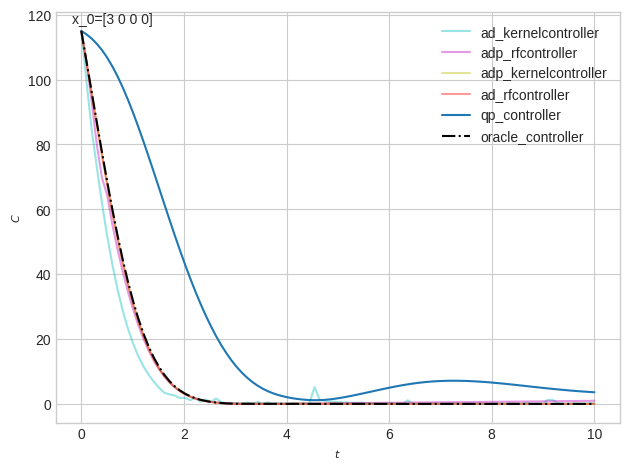

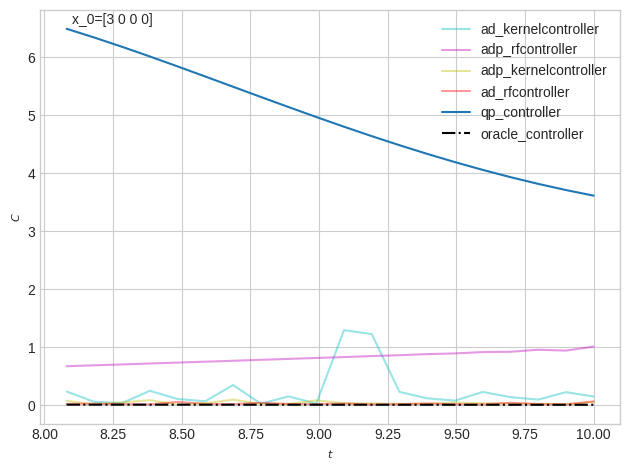

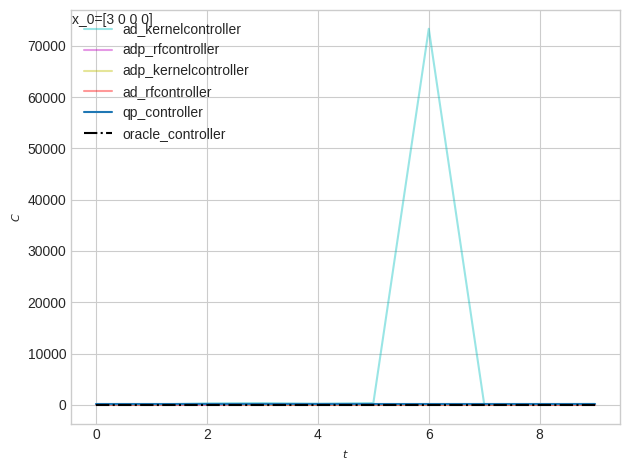

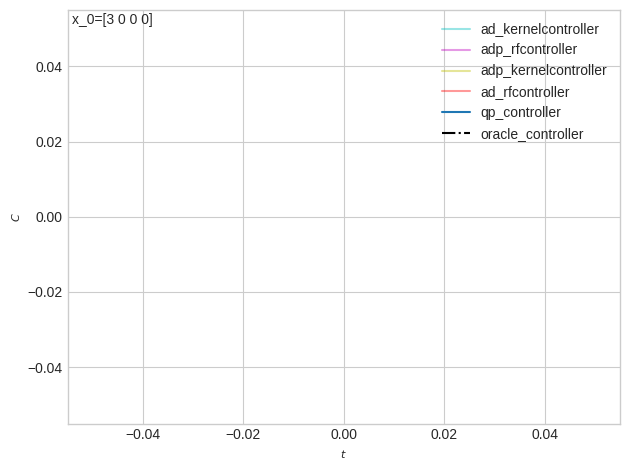

In [6]:
info_data_gen(x_0, controllers, system, lyap_est, T, num_steps, qp_controller, oracle_controller, lyap, eval_c)
plot_info(0, x_0, controllers, 'data/[0,pi,0,0]/eval_c.npz')
plot_info(epochs, x_0, controllers, 'data/diff.npz')